In [58]:
import numpy as np
import pandas as pd
from sklearn import preprocessing, model_selection,\
linear_model, metrics, pipeline

import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df = pd.read_csv("/data/credit-default.csv")
df.head()

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_length,installment_rate,personal_status,other_debtors,...,property,age,installment_plan,housing,existing_credits,default,dependents,telephone,foreign_worker,job
0,< 0 DM,6,critical,radio/tv,1169,unknown,> 7 yrs,4,single male,none,...,real estate,67,none,own,2,1,1,yes,yes,skilled employee
1,1 - 200 DM,48,repaid,radio/tv,5951,< 100 DM,1 - 4 yrs,2,female,none,...,real estate,22,none,own,1,2,1,none,yes,skilled employee
2,unknown,12,critical,education,2096,< 100 DM,4 - 7 yrs,2,single male,none,...,real estate,49,none,own,1,1,2,none,yes,unskilled resident
3,< 0 DM,42,repaid,furniture,7882,< 100 DM,4 - 7 yrs,2,single male,guarantor,...,building society savings,45,none,for free,1,1,2,none,yes,skilled employee
4,< 0 DM,24,delayed,car (new),4870,< 100 DM,1 - 4 yrs,3,single male,none,...,unknown/none,53,none,for free,2,2,2,none,yes,skilled employee


In [3]:
df.default.value_counts()

1    700
2    300
Name: default, dtype: int64

In [48]:
target = "default"
X = df.drop(columns=[target])
X = pd.get_dummies(X, drop_first=True)
columns = X.columns

X = X.values.astype("float")

y = preprocessing.LabelEncoder().fit_transform(df[target])

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y,
                           test_size = 0.3, random_state = 147595)

pipe = pipeline.Pipeline([
    ("poly", preprocessing.PolynomialFeatures(degree=2
                                    , include_bias=False)),
    ("scaler", preprocessing.StandardScaler()),
    ("est", linear_model.LogisticRegression(random_state=1
                                , C = 0.1, solver="liblinear"))
])


pipe.fit(X_train, y_train)

y_train_pred = pipe.predict(X_train)
y_test_pred = pipe.predict(X_test)


In [36]:
metrics.confusion_matrix(y_train, y_train_pred)

array([[455,  37],
       [ 22, 186]])

In [49]:
metrics.confusion_matrix(y_test, y_test_pred)

array([[168,  40],
       [ 43,  49]])

In [37]:
(442 + 128)/len(X_train)

0.8142857142857143

In [38]:
metrics.accuracy_score(y_train, y_train_pred)

0.9157142857142857

In [39]:
pd.Series(y_train).value_counts()/len(y_train)

0    0.702857
1    0.297143
dtype: float64

In [40]:
metrics.accuracy_score(y_test, y_test_pred)

0.7166666666666667

In [41]:
pd.Series(y_test).value_counts()/len(y_test)

0    0.693333
1    0.306667
dtype: float64

In [43]:
y_test_pred

array([0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0])

In [53]:
y_test_prob = pipe.predict_proba(X_test)[:, 1]
y_test_prob

array([1.30427004e-02, 5.53291035e-01, 5.66147298e-03, 2.79872724e-01,
       6.66363409e-02, 9.22189704e-01, 1.21096311e-03, 9.27464563e-01,
       6.27427090e-03, 9.39976814e-01, 2.98125121e-01, 1.13232343e-01,
       1.69447419e-01, 8.45736529e-03, 7.51618002e-02, 5.31281904e-01,
       9.97286909e-01, 4.48364409e-06, 4.33228394e-01, 5.10605649e-02,
       5.30493871e-02, 1.09541926e-02, 9.95753684e-01, 5.44225948e-02,
       8.02909667e-02, 1.29760151e-01, 2.27094526e-01, 7.82818877e-01,
       3.29559650e-03, 2.06808573e-01, 1.27389358e-01, 4.87636237e-03,
       7.29277449e-01, 9.12570880e-01, 2.40330482e-01, 2.10099059e-01,
       9.28076774e-01, 7.38895245e-01, 1.03577472e-01, 9.29640564e-01,
       1.67020509e-04, 8.12340371e-03, 2.56644338e-01, 4.12001045e-01,
       7.60970172e-01, 6.41323222e-01, 9.89907584e-01, 2.16921627e-01,
       9.85593936e-01, 9.08851114e-01, 4.97476684e-01, 9.99245104e-01,
       3.43931591e-02, 1.76655128e-01, 3.26289726e-01, 1.00398705e-02,
      

In [54]:
y_test_pred = np.where(y_test_prob>0.5,1,0)
metrics.confusion_matrix(y_test, y_test_pred)

array([[168,  40],
       [ 43,  49]])

In [55]:
y_test_pred = np.where(y_test_prob>0.2,1,0)
metrics.confusion_matrix(y_test, y_test_pred)

array([[133,  75],
       [ 31,  61]])

In [56]:
y_test_pred = np.where(y_test_prob>0.8,1,0)
metrics.confusion_matrix(y_test, y_test_pred)

array([[184,  24],
       [ 61,  31]])

Text(0.5, 1.0, 'ROC, auc: 0.6989')

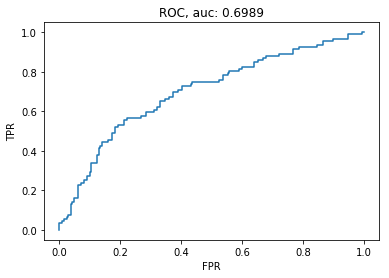

In [65]:
# auc metrics is independent of probability threshold. 
# This metrics is often used for model selection
# Logloss is another metrics independent of threshold used 
# for model selection
# In many problems accuracy is also used for model selection 
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_test_prob)
auc = metrics.auc(fpr, tpr)
plt.plot(fpr, tpr)
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC, auc: %.4f" % auc)

In [68]:
print("accuracy:", metrics.accuracy_score(y_test, y_test_pred))
print("precision:", metrics.precision_score(y_test, y_test_pred))
print("recall:", metrics.recall_score(y_test, y_test_pred))
print("f1_score:", metrics.f1_score(y_test, y_test_pred))

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_test_prob)
auc = metrics.auc(fpr, tpr)
print("auc:",auc)

accuracy: 0.7166666666666667
precision: 0.5636363636363636
recall: 0.33695652173913043
f1_score: 0.42176870748299317
auc: 0.698944397993311


In [69]:
from sklearn import tree

In [77]:
target = "default"
X = df.drop(columns=[target])
X = pd.get_dummies(X, drop_first=True)
columns = X.columns

X = X.values.astype("float")

y = preprocessing.LabelEncoder().fit_transform(df[target])

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y,
                           test_size = 0.3, random_state = 147595)

pipe = pipeline.Pipeline([
    #("poly", preprocessing.PolynomialFeatures(degree=2
    #                                , include_bias=False)),
    #("scaler", preprocessing.StandardScaler()),
    ("est", tree.DecisionTreeClassifier(max_depth=3, min_samples_leaf=20))
])


pipe.fit(X_train, y_train)

y_train_pred = pipe.predict(X_train)
y_test_pred = pipe.predict(X_test)
y_test_prob = pipe.predict_proba(X_test)[:,1]

print("accuracy:", metrics.accuracy_score(y_test, y_test_pred))
print("precision:", metrics.precision_score(y_test, y_test_pred))
print("recall:", metrics.recall_score(y_test, y_test_pred))
print("f1_score:", metrics.f1_score(y_test, y_test_pred))

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_test_prob)
auc = metrics.auc(fpr, tpr)
print("auc:",auc)

accuracy: 0.6633333333333333
precision: 0.4117647058823529
recall: 0.22826086956521738
f1_score: 0.2937062937062937
auc: 0.6470526755852842


In [78]:
est = pipe.steps[-1][-1]

from sklearn.tree import export_graphviz
export_graphviz(est, out_file = "tree.dot", feature_names = columns
                , filled=True)
!dot -Tpng tree.dot -o tree.png


# Exercise:

Create a decision model and run hyper parameter tuning for the hyper parameters - max_depth, min_samples_leaf, criterion. What is accuracy of the model on the test data. 